**Authors:** Timarkanta , Indu 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DOMAIN:** Automatic Ticketing System.

**CONTEXT:** One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT
leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT
service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is
to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no
business impact. In most of the organisations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit
in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The
assignment of incidents to appropriate IT groups is still a manual process in many of the IT organisations. Manual assignment of incidents is
time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out
ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result
in user satisfaction deterioration / poor customer service.

**Business Domain Value:** In the support process, incoming incidents are analysed and assessed by organisations support teams to
fulfill the request. In many organisations, better allocation and effective usage of the valuable support resources will directly result in
substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT
Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket
categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2
teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and
Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3
teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if
vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard
Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before
ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to
L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents
getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed
for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed
timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help
organizations to reduce the resolving time of the issue and can focus on more productive tasks.

**Pre-Processing, Data Visualisation and EDA**
- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualising different patterns
- Visualising different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

# Pre-Processing, Data Visualisation and EDA

In [1]:
#load required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
#Function for reading .csv file
def csvReader(filename):
     return  pd.read_csv(filename)

In [215]:
data = csvReader('/content/drive/MyDrive/Colab Notebooks/input_data.csv')

# Exploring the given Data files and Understanding the Structure of data

In [216]:
data.head()
#Assignment Group is independent variable
#Short description , Description , Caller dependent variable (features)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [8]:
data.shape
#There are 8500 rows & 4 Columns

(8500, 4)

In [7]:
data.info()
#Short description , Description have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8498 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
data.describe(include='all')
#74 Unique Assignment group & GRP_0 is the top Assignment group Group

,Short description,Description,Caller,Assignment group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [28]:
data.isnull().sum()
#missing values in the dataset, within 'Short decription' and 'Description' columns, 

Short description    2
Description          1
Caller               0
Assignment group     0
dtype: int64

In [26]:
data[pd.isnull(data).any(axis=1)]
#Null Values

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
#find duplicates
data.duplicated(subset=['Short description' ,'Description', 'Assignment group' ]).sum()
#There are 591 Duplicate value based on Short description ,Description & Assignment group

591

In [ ]:
data['Assignment group'].nunique()
#74 Unique Assignment group

74

In [ ]:
data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

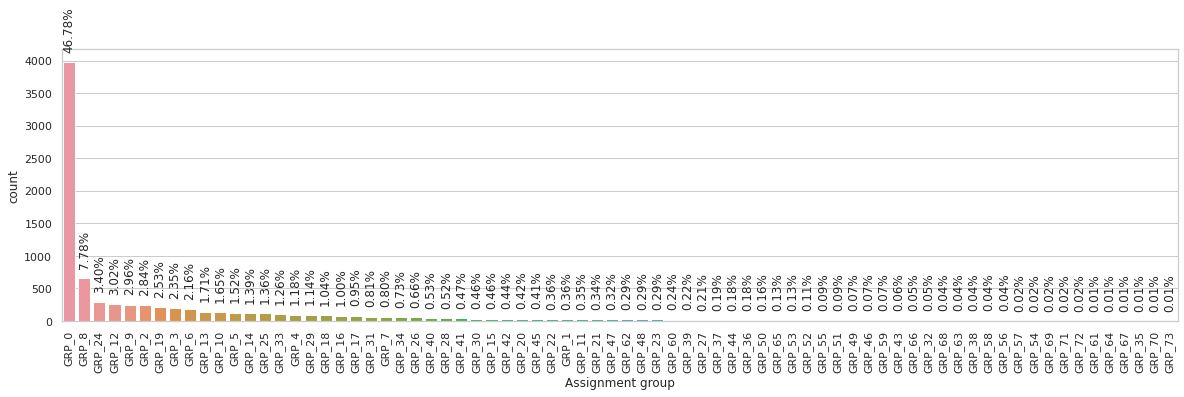

In [10]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data, order=data["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

####This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
####There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2 incidents, 
####need to see if we can drop those rows due to the lack of samples representing those classes. 
####They might not be of much help as a predictor

In [12]:
# view the top 20 Assignment groups with highest number of ticket
df_top_20 = data['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


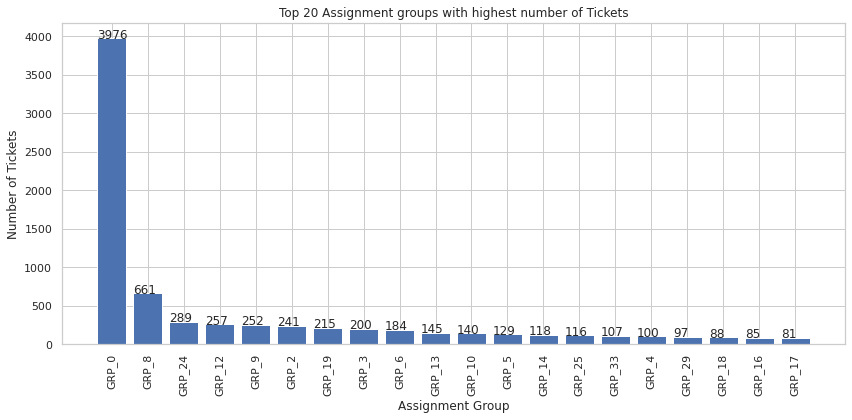

In [13]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [19]:
df_inc = data['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


In [20]:
#Distribute tickets into bins
df_bins = pd.DataFrame(columns=['Description','Ticket Count'], dtype=object)
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


In [15]:
#view the bottom 20 Assignment groups with less number of tickets
df_bottom_20 = data['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_67,1
3,GRP_35,1
4,GRP_70,1
5,GRP_73,1
6,GRP_57,2
7,GRP_54,2
8,GRP_69,2
9,GRP_71,2


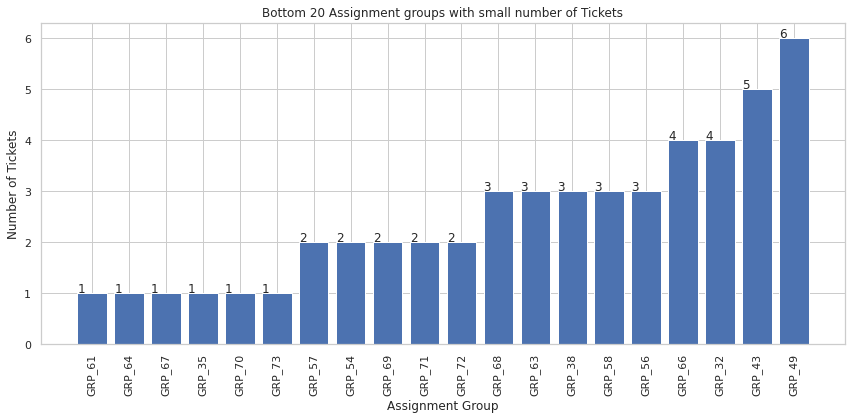

In [16]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

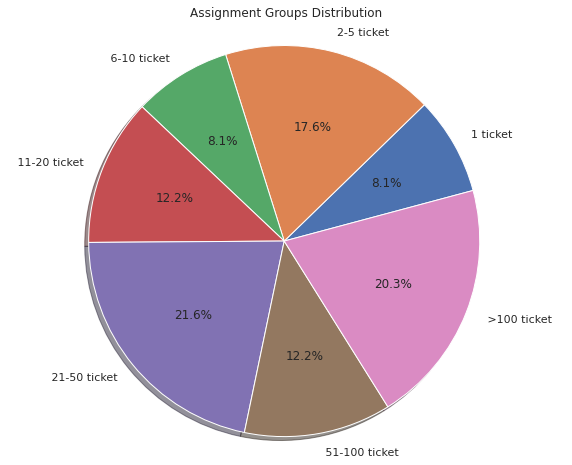

In [24]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

####There are 6 Assignment Group’s for which just have 1 ticket in the dataset
####There are 15 Assignment group’s which have more than 100 tickets.
####Only 20% of the Assignment groups have greater than 100 tickets.

In [30]:
print("The Description")
print("MAX str length          MIN str length ")
print(data['Description'].str.len().max(), "                        ", data['Description'].str.len().min() )

The Description
MAX str length          MIN str length 
13001.0                          1.0


In [31]:
print("The Short description")
print("MAX str length          MIN str length ")
print(data['Short description'].str.len().max(), "                        ", data['Short description'].str.len().min() )

The Short description
MAX str length          MIN str length 
159.0                          1.0


In [217]:
len(data['Caller'].str.lower().unique())

2950

In [218]:
#See if any caller rasied ricket only in any specific group
data['Caller'].groupby(data['Assignment group']).value_counts().nlargest(10)

Assignment group  Caller           
GRP_8             bpctwhsn kzqsbmtp    362
GRP_9             bpctwhsn kzqsbmtp    153
GRP_0             fumkcsji sarmtlhy    132
GRP_5             bpctwhsn kzqsbmtp     96
GRP_6             bpctwhsn kzqsbmtp     89
GRP_0             rbozivdq gmlhrtvp     86
GRP_10            bpctwhsn kzqsbmtp     60
GRP_0             olckhmvx pcqobjnd     54
GRP_8             ZkBogxib QsEJzdZO     54
GRP_0             efbwiadp dicafxhv     45
Name: Caller, dtype: int64

**Inital Data Analysis**
#### Data has 8500 rows & 4 columns
#### Data columns are : 
#### Short description => Feature Column (Dependent Column)
#### Description => Feature Column (Dependent Column)
#### Caller => Feature Column (Dependent Column)
#### Assignment group => Target (Independent Column)
#### Assignment group has 74 unique values
#### Grp_0 has max values 3976
#### There are 6 Assignment Group with one sample 
#### There are 2 rows with data is missing for short description 1 row with null desciption. Will see if a cobination of short description + description solve null value issue. 
#### 2950 unique callers 
#### fumkcsji sarmtlhy has rasied 134 tickets and 132 tickets out of it have been in Group0
#### rbozivdq gmlhrtvp has rasied 87 tickets and 86 of it is in GRP_0
#####olckhmvx pcqobjnd has raised 54 ticekts and all 54 are in GRP_0

In [34]:
# Fixing text that has "curly quotes" applied on top i.e. mojibreaks that arise due to ACII encoding
!pip install ftfy
!pip install langdetect
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 9.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c77d8bcc45664731362ac57cf0bc4c0d8df3bda7053a406f983f69035e13eced
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 1.4 MB 15.8 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wh

In [219]:
from ftfy import fix_encoding, fix_text, badness
fix_text('machine nÃ£o estÃ¡ funcionando')

'machine não está funcionando'

In [220]:
#lower the text , remove special character , numbers , emails , 
def clean_data(text  ):
    #remove caller name from text
    text=text.lower()
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
    #remove tab breaks
    text = fix_text(text)
    text = re.sub(r"received from:",'',text)
    text = re.sub(r"hi",' ',text)
    text = re.sub(r"this message was sent from an unmonitored email address",'',text)
    text = re.sub(r"email:",' ',text)
    text = re.sub(r"email address:",'',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"sddubject:",'',text)
    text = re.sub(r"please do not reply to this message",' ',text)
    text = re.sub(r"monitoring_tool@company.com",'MonitoringTool',text)
    text = re.sub(r"select the following link to view the disclaimer in an alternate language",' ',text)
    text = re.sub(r"description problem",'',text)
    text = re.sub(r"steps taken far",' ',text)
    text = re.sub(r"please do the needful",'',text)
    text = re.sub(r"customer job title",' ',text)
    text = re.sub(r"sales engineer contact",'',text)
    text = re.sub(r"please note that",' ',text)
    text = re.sub(r"please find below",'',text)
    text = re.sub(r"hello",'',text)
    text = re.sub(r"date and time",' ',text)
    text = re.sub(r"kindly refer mail:",'',text)
    text = re.sub(r"name:",' ',text)
    text = re.sub(r"language:",'',text)
    text = re.sub(r"customer number:",' ',text)
    text = re.sub(r"telephone:",'',text)
    text = re.sub(r"summary:",' ',text)
    text = re.sub(r"sincerely",'',text)
    text = re.sub(r"company inc",' ',text)
    text = re.sub(r"hallo",'',text)
    text = re.sub(r"hi it team",' ',text)
    text = re.sub(r"hi team",'',text)
    text = re.sub(r"best",' ',text)
    text = re.sub(r"kind",'',text)
    text = re.sub(r"regards",' ',text)
    text = re.sub(r"good morning",'',text)
    text = re.sub(r"regards",' ',text)
    text = re.sub(r"please",'',text)
    
    text = re.sub(r'\t', '',text)
    
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #Remove leading & trailing Spaces
    text = re.sub(r"^\s+|\s+$", "", text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    #Keep only alpabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [221]:
#Convert 'Short description', 'Description' to str
data[['Short description', 'Description']] = data[['Short description', 'Description']].astype(str)
callers = data['Caller'].str.lower().unique()
data['Short description'] = data['Short description'].apply(clean_data )
data['Description'] = data['Description'].apply(clean_data )


In [222]:
def combineText(ShortDesc , Desc):
  finaltext = ""
  
  if ShortDesc == Desc:
    finaltext = Desc
  else:
    finaltext = ShortDesc + " " + Desc
  
  return  finaltext

In [223]:
#combine Short description and Description
# apply function
data['Ticket'] = data.apply(lambda x: combineText(x['Short description'], x['Description']), axis=1)

In [224]:
data.head()
#Short description and Description Combined

,Short description,Description,Caller,Assignment group,Ticket
0,login issue,verified user details employee and manager nam...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...
1,outlook,team my meetings skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings skype meetings etc ar...
2,cant log in to vpn,i cannot log on to vpn,eylqgodm ybqkwiam,GRP_0,cant log in to vpn i cannot log on to vpn
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


In [225]:
#detect other laguages in data set
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'

data['langue'] = data['Ticket'].apply(detect_my)

In [226]:
data['langue'].value_counts()

en         6998
de          383
af          305
it          162
fr          132
no           71
sv           68
es           59
nl           59
ca           44
da           34
unknown      33
ro           25
sl           22
pt           19
tl           17
pl           15
et           12
cy           10
lv            7
fi            5
so            4
id            4
lt            3
hr            3
cs            2
sk            2
vi            1
sq            1
Name: langue, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


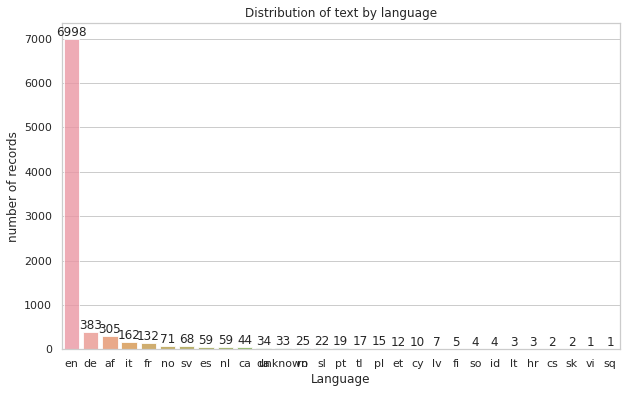

In [227]:
x = data['langue'].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [228]:
from googletrans import Translator
translator = Translator()

In [229]:
#Translate the text to English
# Function to translate the text to english.
def translate_to_en(text,lang):
  try:
    if lang == 'en':
        return text
    else:
        return translator.translate(text).text
  except:
    return text


In [230]:
data['en_Description'] = data.apply(lambda x: translate_to_en(x['Ticket'], x['langue']), axis=1)
#Translate the Combined decsription to English language , so that we are doing classification of tickets based on English language

In [231]:
data

,Short description,Description,Caller,Assignment group,Ticket,langue,en_Description
0,login issue,verified user details employee and manager nam...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...,en,login issue verified user details employee and...
1,outlook,team my meetings skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings skype meetings etc ar...,en,outlook team my meetings skype meetings etc ar...
2,cant log in to vpn,i cannot log on to vpn,eylqgodm ybqkwiam,GRP_0,cant log in to vpn i cannot log on to vpn,it,cant log in to vpn i cannot log on to vpn
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,en,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,no,skype error
...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,good afternoon am not receiving the emails tha...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail good afterno...,en,emails not coming in from zz mail good afterno...
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,GRP_0,telephony software issue,en,telephony software issue
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxruyf,en,vip windows password reset for tifpdchb pedxruyf
8498,mac ne o est funcionando,i am unable to access the mac ne utilities to ...,ufawcgob aowhxjky,GRP_62,mac ne o est funcionando i am unable to access...,en,mac ne o est funcionando i am unable to access...


In [232]:
#Drop Not required columns 
finaldf = data.drop(['Caller' , 'Short description' , 'Description' , 'Caller' , 'Ticket' , 'langue'],  axis = 1 )

In [233]:
finaldf.head()

,Assignment group,en_Description
0,GRP_0,login issue verified user details employee and...
1,GRP_0,outlook team my meetings skype meetings etc ar...
2,GRP_0,cant log in to vpn i cannot log on to vpn
3,GRP_0,unable to access hr tool page
4,GRP_0,skype error


In [234]:
finaldf.loc[finaldf['en_Description'].str.strip() == ''].count()

Assignment group    33
en_Description      33
dtype: int64

In [235]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 
# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [236]:
#Removing Stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [237]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence.lower())
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
  
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

In [238]:
remove_stopwords('mac ne est funcionando I be unable to access')

'mac ne est funcionando unable access'

In [239]:
finaldf['en_Description'] = finaldf['en_Description'].apply(lambda x : remove_stopwords(x) )

In [240]:
finaldf['en_Description']
#After removal of Stop Words

0       login issue verified user details employee man...
1       outlook team meetings skype meetings etc appea...
2                                    cant log vpn log vpn
3                              unable access hr tool page
4                                             skype error
                              ...                        
8495    emails coming zz mail good afternoon receiving...
8496                             telephony software issue
8497         vip windows password reset tifpdchb pedxruyf
8498    mac ne est funcionando unable access mac ne ut...
8499    various programs opened several pc various pro...
Name: en_Description, Length: 8500, dtype: object

In [241]:
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

finaldf['en_Description'] = finaldf['en_Description'].apply(lemmatize_text)

In [242]:
finaldf['en_Description']
#After lemmitzation 

0       login issue verify user detail employee manage...
1       outlook team meeting skype meeting etc appear ...
2                                 can not log vpn log vpn
3                              unable access hr tool page
4                                             skype error
                              ...                        
8495    email come zz mail good afternoon receiving em...
8496                             telephony software issue
8497          vip window password reset tifpdchb pedxruyf
8498    mac ne est funcionando unable access mac ne ut...
8499    various program open several pc various progra...
Name: en_Description, Length: 8500, dtype: object

In [243]:
#find duplicates
finaldf.duplicated(subset=['en_Description' , 'Assignment group' ]).sum()
#There are  records which are duplicate

1840

In [244]:
#remove duplicates
finaldf.drop_duplicates(subset=['en_Description' ,'Assignment group' ] , keep='first' , inplace=True)

In [245]:
#number of length in each Ticket
finaldf['length']=[len(text) for text in finaldf['en_Description']]
#number of words in each Ticket
finaldf['len_words'] = finaldf['en_Description'].apply(lambda x: len(x.split(" ")))

In [246]:
finaldf.shape

(6660, 4)

In [247]:
finaldf.loc[finaldf['en_Description'] == ''].count()

Assignment group    5
en_Description      5
length              5
len_words           5
dtype: int64

In [248]:
  # Replace empty strings with Null
finaldf['en_Description'].replace('', np.nan, inplace = True)

In [249]:
finaldf.isnull().sum()

Assignment group    0
en_Description      5
length              0
len_words           0
dtype: int64

In [250]:
finaldf.dropna(inplace=True)

In [251]:
finaldf.shape


(6655, 4)

In [252]:
data1=finaldf[finaldf['len_words']<2].copy()
#find rows where Description in of one word 

In [253]:
data1

,Assignment group,en_Description,length,len_words
39,GRP_0,call,4,1
823,GRP_0,boot,4,1
1271,GRP_30,fe,2,1
1710,GRP_48,stp,3,1
1712,GRP_48,outlook,7,1
1805,GRP_30,wifi,4,1
2848,GRP_0,k,1,1
2980,GRP_30,hp,2,1
3007,GRP_31,win,3,1
3300,GRP_30,outlook,7,1


In [254]:
data1.shape
#There are 29 rows where Description in one word

(29, 4)

In [255]:
finaldf.drop(finaldf[finaldf['len_words'] < 2].index, inplace = True)
#since these single word Decription does not help in predection , we can drop them

In [256]:
finaldf.shape

(6626, 4)

In [257]:
#find duplicates
finaldf.duplicated(subset=['en_Description' , 'Assignment group' ]).sum()
#There are  records which are duplicate

0

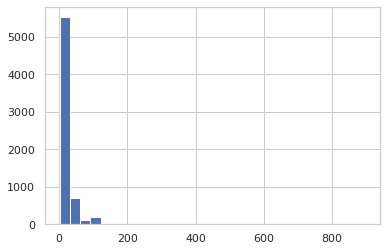

In [258]:
finaldf['len_words'].hist(bins=30);

In [151]:
!pip install -q pyLDAvis 

     |████████████████████████████████| 1.7 MB 7.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [259]:
# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()

In [260]:
#to process the simple_process gensim package as input needed as string 
corpus=finaldf.en_Description.values.tolist()

In [261]:
corpus[1]

'outlook team meeting skype meeting etc appear outlook calendar somebody advise correct'

In [262]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

In [263]:
print(data_words[1])

['outlook', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [264]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [265]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [266]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

**WordCloud **

In [267]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [268]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

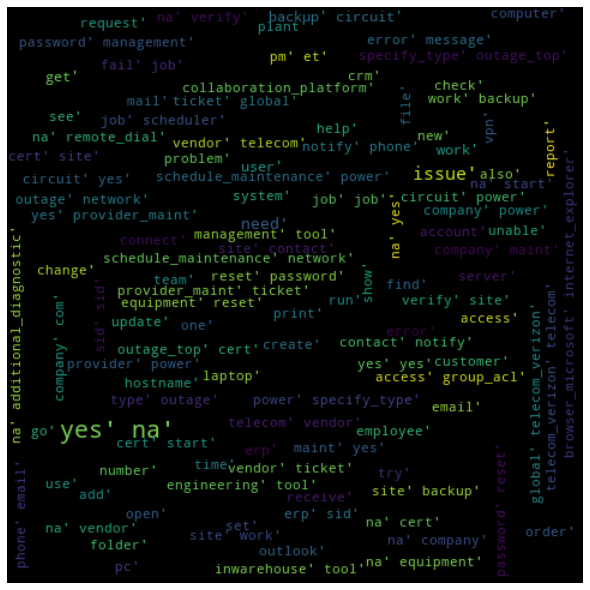

In [269]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(8,8),facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

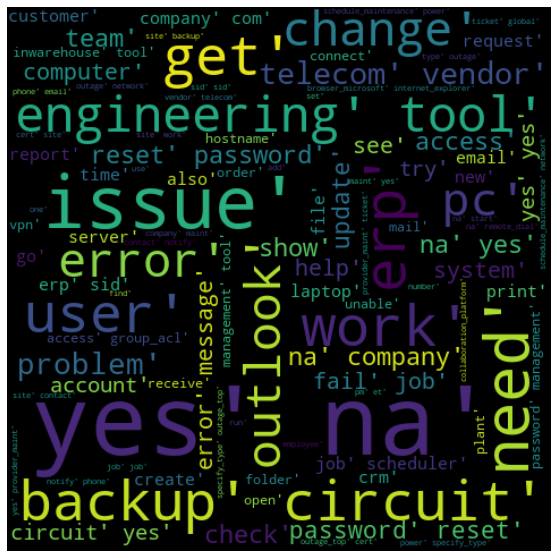

In [270]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [271]:
#Copying to new dataframe to create wordclouds on target class

new_df = finaldf.copy()
new_df['words'] = data_words_bigrams
new_df

,Assignment group,en_Description,length,len_words,words
0,GRP_0,login issue verify user detail employee manage...,150,24,"[login, issue, verify, user, detail, employee,..."
1,GRP_0,outlook team meeting skype meeting etc appear ...,86,12,"[outlook, team, meeting, skype, meeting, etc, ..."
2,GRP_0,can not log vpn log vpn,23,6,"[can_not, log, vpn, log, vpn]"
3,GRP_0,unable access hr tool page,26,5,"[unable, access, hr, tool, page]"
4,GRP_0,skype error,11,2,"[skype, error]"
...,...,...,...,...,...
8495,GRP_29,email come zz mail good afternoon receiving em...,69,12,"[email, come, zz_mail, good_afternoon, receivi..."
8496,GRP_0,telephony software issue,24,3,"[telephony_software, issue]"
8497,GRP_0,vip window password reset tifpdchb pedxruyf,43,6,"[vip, window, password, reset, tifpdchb, pedxr..."
8498,GRP_62,mac ne est funcionando unable access mac ne ut...,94,14,"[mac_ne, est, funcionando, unable, access, mac..."


In [272]:
#Sorting based on frequency of target class Assignment group

value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_2', 'GRP_12', 'GRP_24', 'GRP_19', 'GRP_3',
       'GRP_13', 'GRP_14', 'GRP_25', 'GRP_33', 'GRP_29', 'GRP_4', 'GRP_16',
       'GRP_18', 'GRP_10', 'GRP_9', 'GRP_6', 'GRP_7', 'GRP_34', 'GRP_26',
       'GRP_5', 'GRP_31', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15', 'GRP_42',
       'GRP_20', 'GRP_17', 'GRP_22', 'GRP_11', 'GRP_45', 'GRP_21', 'GRP_1',
       'GRP_23', 'GRP_62', 'GRP_47', 'GRP_27', 'GRP_39', 'GRP_37', 'GRP_36',
       'GRP_44', 'GRP_50', 'GRP_60', 'GRP_65', 'GRP_53', 'GRP_30', 'GRP_52',
       'GRP_51', 'GRP_55', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43', 'GRP_48',
       'GRP_32', 'GRP_66', 'GRP_63', 'GRP_68', 'GRP_38', 'GRP_58', 'GRP_56',
       'GRP_57', 'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_61', 'GRP_64',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'],
      dtype='object')

In [273]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

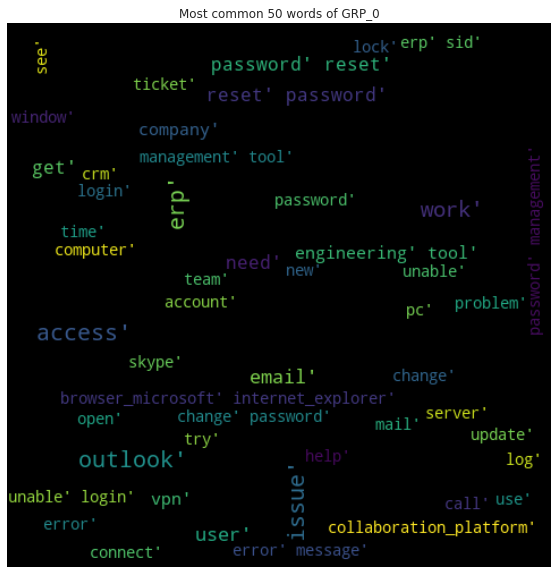

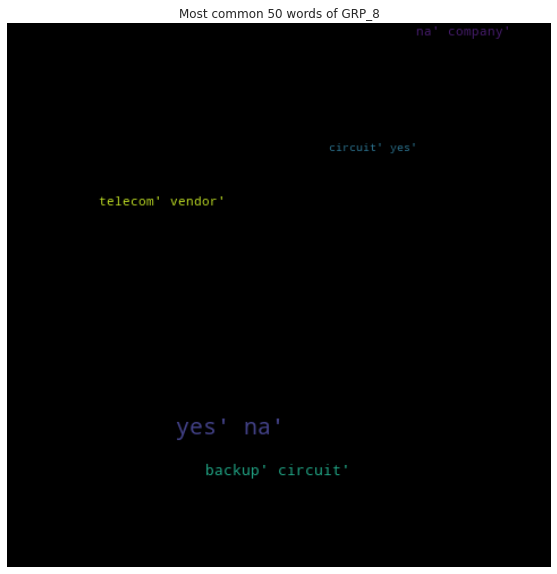

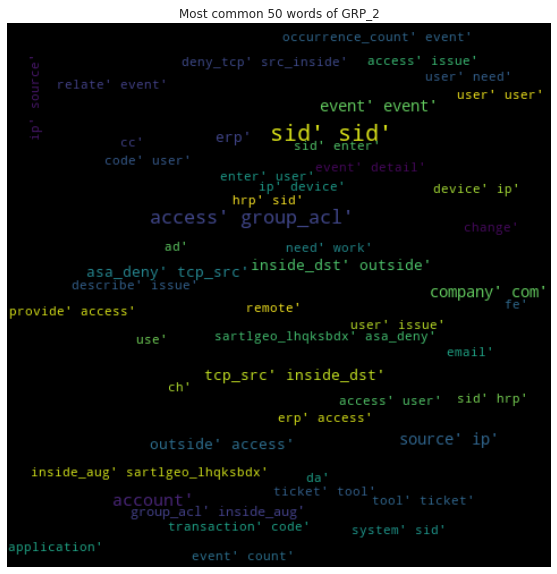

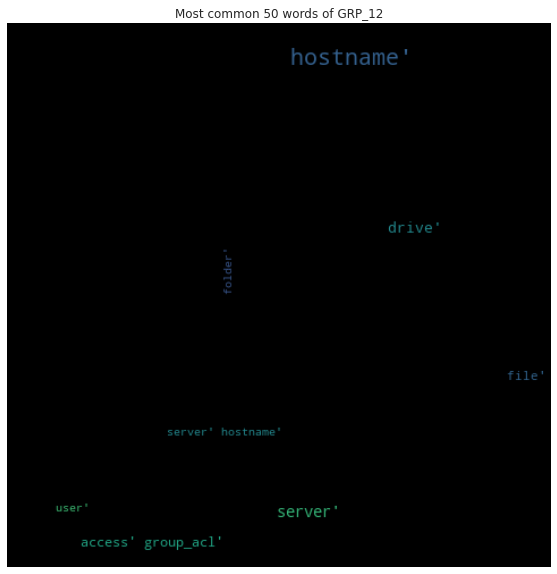

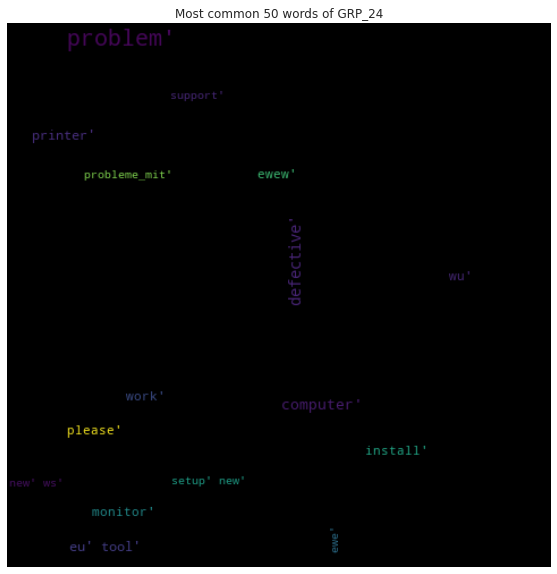

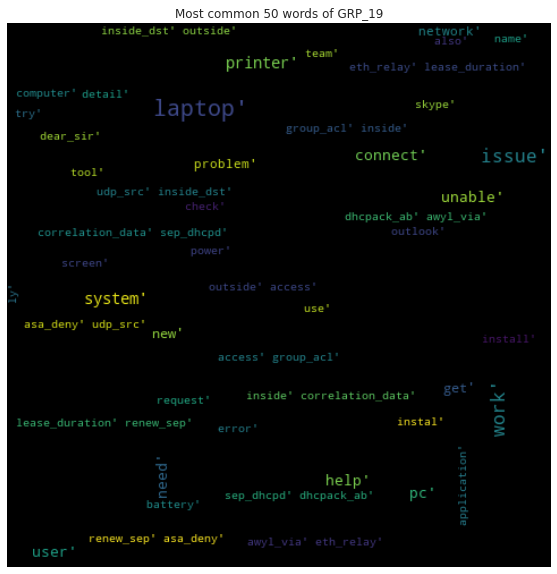

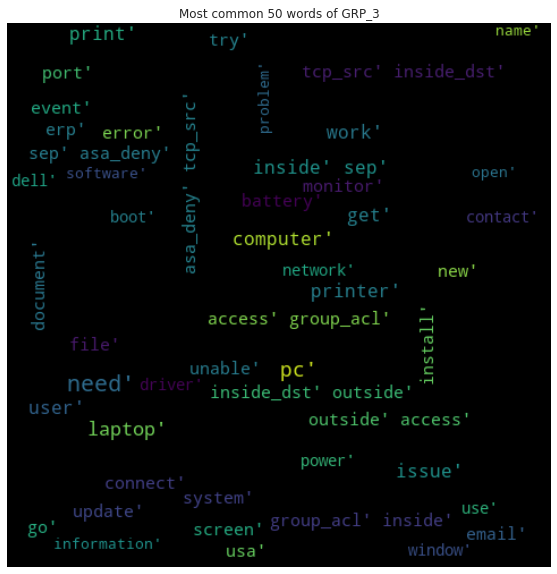

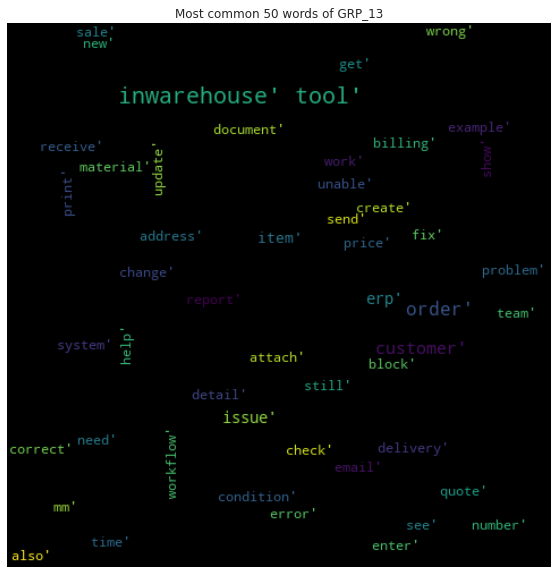

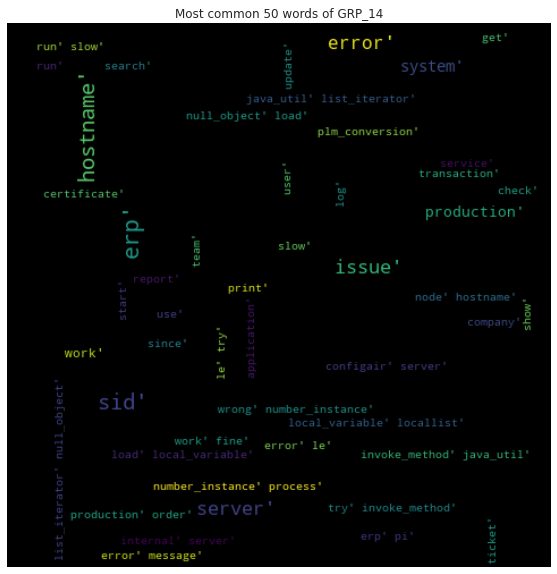

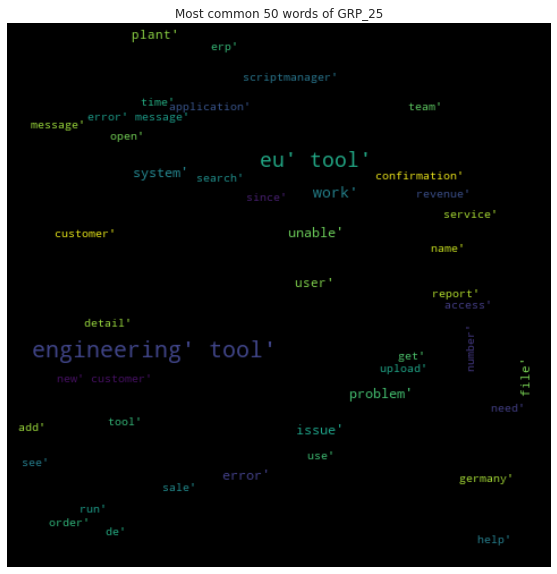

In [274]:
#for loop to pass the top 10 Assignment groups

for i in range(10):

    Grp = new_df[new_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])

In [275]:
data_cp = finaldf.copy()

In [276]:
data_cp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,6626.0,149.276788,296.139396,5.0,39.0,86.0,161.0,5709.0
len_words,6626.0,22.860700,45.593661,2.0,6.0,13.0,24.0,895.0


In [277]:
bins=[0,50,75, np.inf]
data_cp['bins']=pd.cut(data_cp.len_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data_cp.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [278]:
word_distribution

,bins,counts
0,0-100,6458
1,100-300,142
2,300-500,8
3,500-800,14
4,>800,4


Text(0.5, 1.0, 'Word distribution per bin')

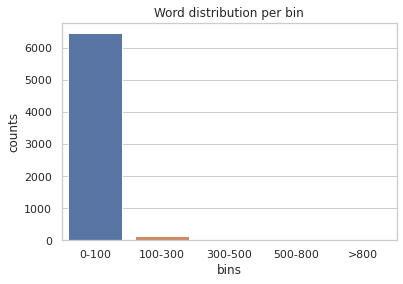

In [279]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

Most of the descrption of the problems raised by callers are short with in 0-100 words
Few items are with bit descriptive

In [289]:
finaldf["Assignment group"].nunique()

74

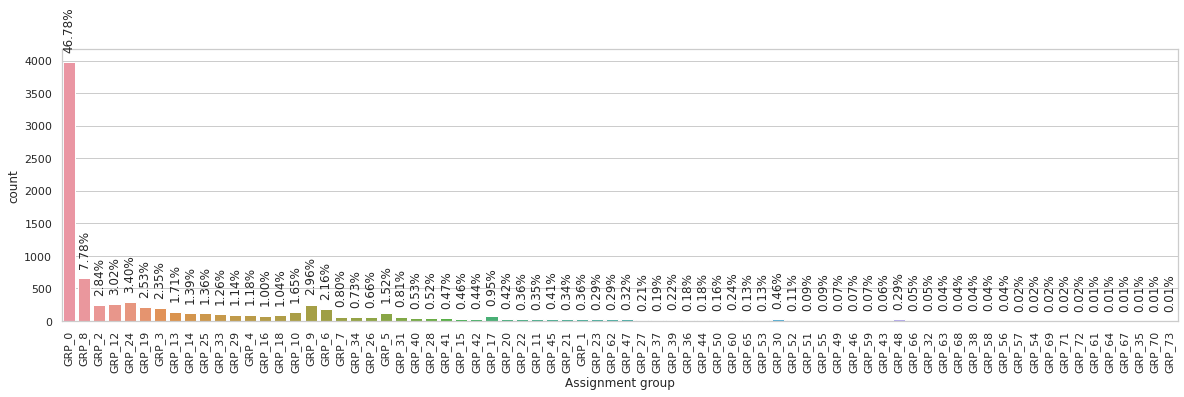

In [285]:
 #Plot to visualize the percentage data distribution across different groups after preprocessing 
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data, order=finaldf["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

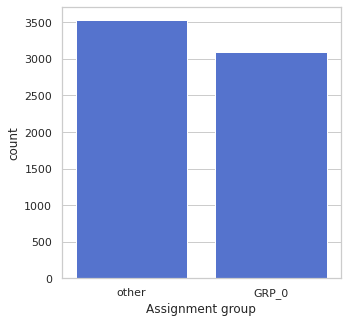

In [280]:
# Create the Dataset for classifying GRP_0
TicketGRP0DF = finaldf.copy()
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x.valu != 'GRP_0'  else x)
descending_order = TicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=TicketGRP0DF, color='royalblue',order=descending_order)

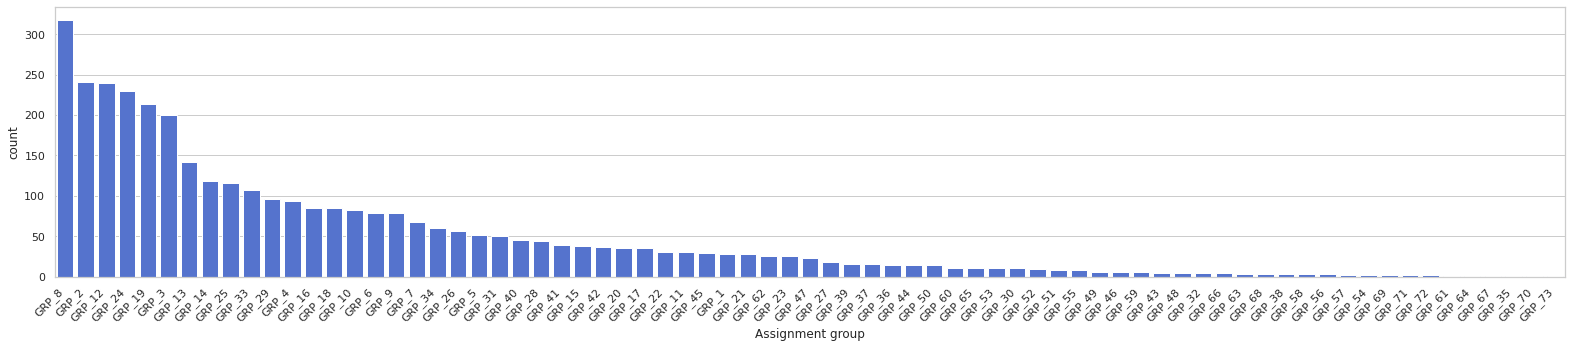

In [281]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = finaldf[finaldf['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observation**

There is high imbalance within the other group, For machine learning we can take Assignment Groups where there are more that 15 Samples rest we can combine to form new Group.
If ticket is pridected for new group we can route the ticket for manual classification until we have suifficent data for those groups.

Once we have more data for remaining group we can re-train by including that group . 


In [304]:
counts = finaldf['Assignment group'].value_counts()
res = finaldf[finaldf['Assignment group'].isin(counts[counts >= 15 ].index)]
print("Groups more than 20 Samples: " , res['Assignment group'].nunique())
res['Assignment group'].value_counts()

Groups more than 20 Samples:  43


GRP_0     3091
GRP_8      318
GRP_2      241
GRP_12     240
GRP_24     230
GRP_19     214
GRP_3      200
GRP_13     142
GRP_14     118
GRP_25     116
GRP_33     107
GRP_29      96
GRP_4       94
GRP_16      85
GRP_18      85
GRP_10      82
GRP_6       79
GRP_9       79
GRP_7       68
GRP_34      60
GRP_26      56
GRP_5       51
GRP_31      50
GRP_40      45
GRP_28      44
GRP_41      39
GRP_15      38
GRP_42      37
GRP_20      36
GRP_17      36
GRP_22      31
GRP_11      30
GRP_45      29
GRP_21      28
GRP_1       28
GRP_23      25
GRP_62      25
GRP_47      23
GRP_27      18
GRP_37      16
GRP_39      16
GRP_36      15
GRP_44      15
Name: Assignment group, dtype: int64

In [316]:
counts = finaldf['Assignment group'].value_counts()
res = finaldf[finaldf['Assignment group'].isin(counts[counts < 15 ].index)]
print("Groups less than 15 Samples: " , res['Assignment group'].nunique())
print(res['Assignment group'].value_counts().sum())
res['Assignment group'].value_counts()

Groups less than 15 Samples:  31
150


GRP_50    14
GRP_30    11
GRP_65    11
GRP_60    11
GRP_53    11
GRP_52     9
GRP_55     8
GRP_51     8
GRP_59     6
GRP_49     6
GRP_46     6
GRP_48     5
GRP_43     5
GRP_66     4
GRP_32     4
GRP_68     3
GRP_38     3
GRP_63     3
GRP_58     3
GRP_56     3
GRP_54     2
GRP_57     2
GRP_69     2
GRP_71     2
GRP_72     2
GRP_61     1
GRP_35     1
GRP_64     1
GRP_67     1
GRP_70     1
GRP_73     1
Name: Assignment group, dtype: int64

Data from Assignment Group other than GRP_0 is highly unbalanced .

Assignnment Groups with sample more than or equal to 15 are 42.

Assignnment Groups with sample less than 15 are 31, which can be combined as 'GRPL15' form a new Group. Which can be further classified manually currently

Once we collect more data for groups with less sample we can re-train the model with explict groups.

In [309]:
#Combining Assignment Group for Data with Samples less than 15
grp_lst = res['Assignment group'].unique().tolist()
grp_lst

['GRP_30',
 'GRP_35',
 'GRP_38',
 'GRP_43',
 'GRP_46',
 'GRP_49',
 'GRP_50',
 'GRP_51',
 'GRP_52',
 'GRP_53',
 'GRP_54',
 'GRP_55',
 'GRP_56',
 'GRP_57',
 'GRP_58',
 'GRP_59',
 'GRP_60',
 'GRP_48',
 'GRP_61',
 'GRP_32',
 'GRP_63',
 'GRP_64',
 'GRP_65',
 'GRP_66',
 'GRP_67',
 'GRP_68',
 'GRP_69',
 'GRP_70',
 'GRP_71',
 'GRP_72',
 'GRP_73']

In [325]:
#Create the copy on dataset to update new column values
u_data = finaldf.copy()

In [326]:
u_data["Assignment group"] = u_data["Assignment group"].apply(lambda x : 'OGRPU15' if x in grp_lst  else x)

In [327]:
u_data["Assignment group"].value_counts()

GRP_0      3091
GRP_8       318
GRP_2       241
GRP_12      240
GRP_24      230
GRP_19      214
GRP_3       200
OGRPU15     150
GRP_13      142
GRP_14      118
GRP_25      116
GRP_33      107
GRP_29       96
GRP_4        94
GRP_16       85
GRP_18       85
GRP_10       82
GRP_6        79
GRP_9        79
GRP_7        68
GRP_34       60
GRP_26       56
GRP_5        51
GRP_31       50
GRP_40       45
GRP_28       44
GRP_41       39
GRP_15       38
GRP_42       37
GRP_17       36
GRP_20       36
GRP_22       31
GRP_11       30
GRP_45       29
GRP_1        28
GRP_21       28
GRP_23       25
GRP_62       25
GRP_47       23
GRP_27       18
GRP_37       16
GRP_39       16
GRP_36       15
GRP_44       15
Name: Assignment group, dtype: int64

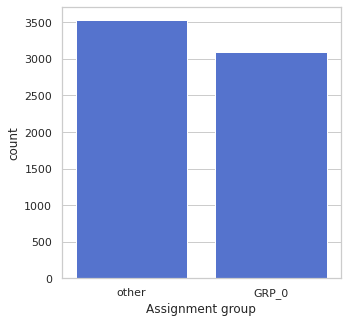

In [328]:
#now divide the Group in two data sets
# Create the Dataset for classifying GRP_0
TicketGRP0DF = u_data.copy()
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)
descending_order = TicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=TicketGRP0DF, color='royalblue',order=descending_order)

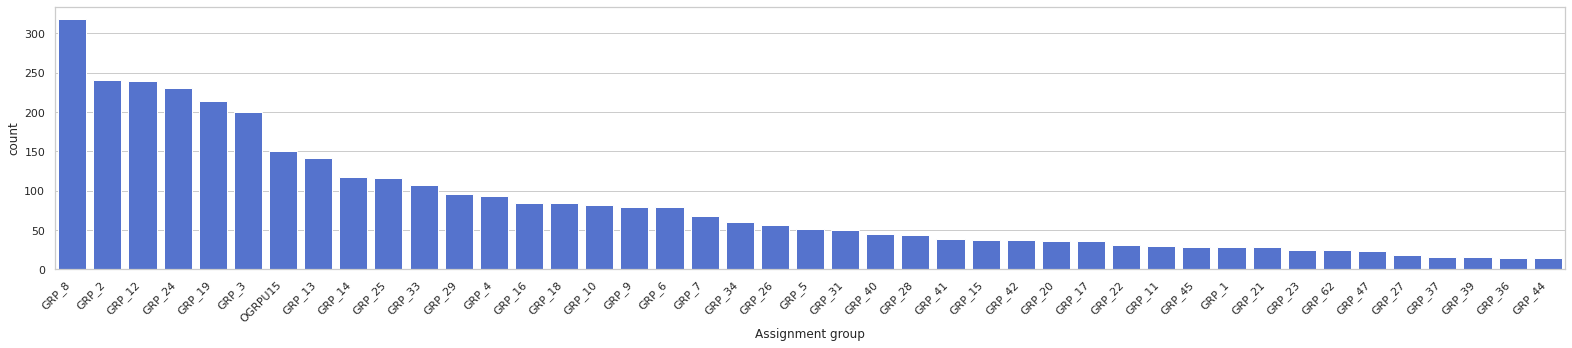

In [329]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = u_data[u_data['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [330]:
maxOthers = itTicketOthersDF['Assignment group'].value_counts().max()
maxOthers

318

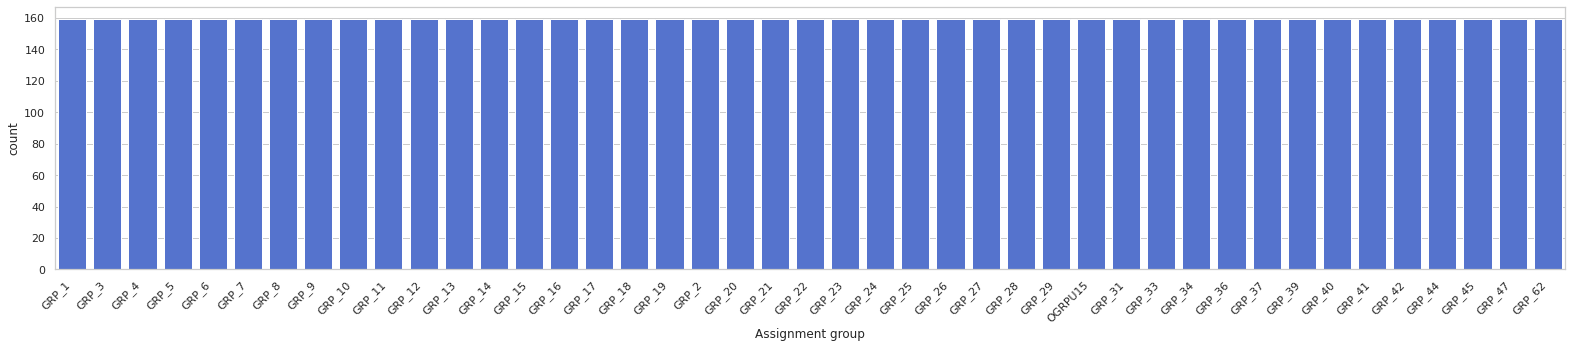

In [331]:
# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample
itTicketOthersDF_resampled = itTicketOthersDF[0:0]
for grp in itTicketOthersDF['Assignment group'].unique():
    itTicketGrpDF = itTicketOthersDF[itTicketOthersDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    itTicketOthersDF_resampled = itTicketOthersDF_resampled.append(resampled)

descending_order = itTicketOthersDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

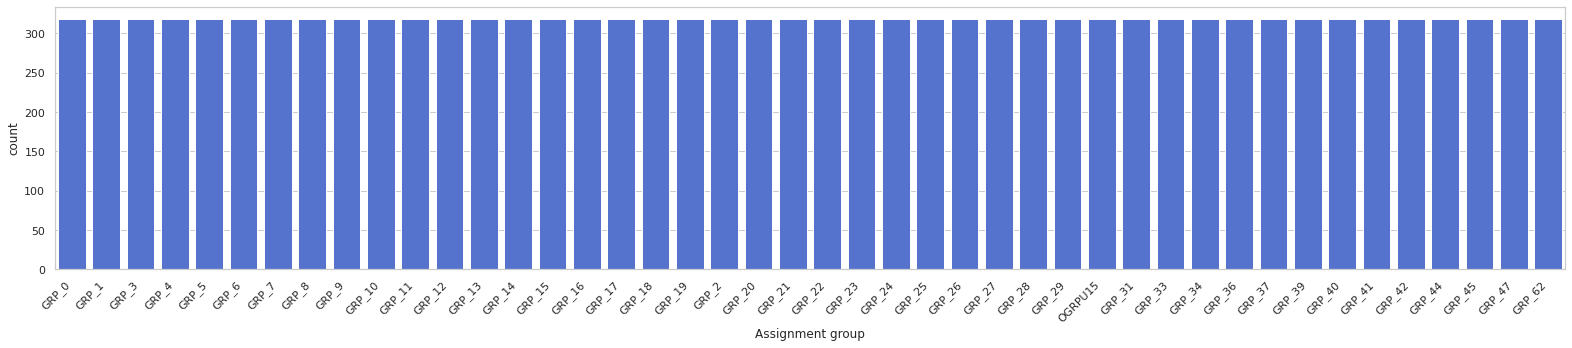

In [333]:
# Treat the imbalnce in the itTicketDF dataset by resampling to 661.This is for us to try creating a single model which use the whiole dataset & verify the performance
itTicketDF_resampled = u_data[0:0]
for grp in u_data['Assignment group'].unique():
    itTicketGrpDF = u_data[u_data['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    itTicketDF_resampled = itTicketDF_resampled.append(resampled)

descending_order = itTicketDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Prepare data for Machine learning

In [335]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(TicketGRP0DF['en_Description'], TicketGRP0DF['Assignment group'], stratify=TicketGRP0DF['Assignment group'], test_size=0.33, random_state=42)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4439,) (4439,)
Test (2187,) (2187,)


In [336]:
from sklearn.preprocessing import LabelEncoder
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [337]:
batch_size = 32